In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [2]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint

# if you get a ffmpeg error when creating movies try `conda install -c conda-forge ffmpeg` and restart Anaconda

# Computational Mathematics  <a class="tocSkip">

## Linear Algebra 2  <a class="tocSkip">
### (more linear algebra and some of its applications)  <a class="tocSkip">
    
### Some supplementary material  <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysing-and-solving-a-second-order-ODE-(the-Mass-Spring-Damper-problem)-[*]" data-toc-modified-id="Analysing-and-solving-a-second-order-ODE-(the-Mass-Spring-Damper-problem)-[*]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysing and solving a second-order ODE (the Mass-Spring-Damper problem) [*]</a></span><ul class="toc-item"><li><span><a href="#Writing-as-a-linear-system" data-toc-modified-id="Writing-as-a-linear-system-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Writing as a linear system</a></span></li><li><span><a href="#Discretisation-with-forward-Euler" data-toc-modified-id="Discretisation-with-forward-Euler-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Discretisation with forward Euler</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exercises</a></span></li><li><span><a href="#Analysing-an-ODE-system:-diagonalisation" data-toc-modified-id="Analysing-an-ODE-system:-diagonalisation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Analysing an ODE system: diagonalisation</a></span></li><li><span><a href="#Eigenvalue-analysis" data-toc-modified-id="Eigenvalue-analysis-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Eigenvalue analysis</a></span></li><li><span><a href="#Stability-of-the-continuous-problem" data-toc-modified-id="Stability-of-the-continuous-problem-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Stability of the <em>continuous problem</em></a></span></li><li><span><a href="#The-exact-solution" data-toc-modified-id="The-exact-solution-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>The exact solution</a></span></li><li><span><a href="#Comparing-the-analytical-solution-against-a-numerical-solver" data-toc-modified-id="Comparing-the-analytical-solution-against-a-numerical-solver-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Comparing the analytical solution against a numerical solver</a></span><ul class="toc-item"><li><span><a href="#An-aside-on-generating-animations" data-toc-modified-id="An-aside-on-generating-animations-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>An aside on generating animations</a></span></li></ul></li></ul></li><li><span><a href="#A-coupled-mass-spring-damper-system-and-a-fancier-ODE-solver-[*]" data-toc-modified-id="A-coupled-mass-spring-damper-system-and-a-fancier-ODE-solver-[*]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A coupled mass spring damper system and a fancier ODE solver [*]</a></span></li></ul></div>

<div class="optional">

# Analysing and solving a second-order ODE (the Mass-Spring-Damper problem) [*]

Let's consider a higher-order ODE problem with some interesting solution behaviour which can be recast using linear algebra into a coupled system of first-order ODEs. It can then be analysed/solved using linear algebra techniques.

The mass-spring-damper system looks something like this:

*(Figure source: https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Mass_spring_damper.svg/1280px-Mass_spring_damper.svg.png)*
<img src="figures/Mass_spring_damper.svg.png" width=500x>


where $x$ is a displacement, $k$ is the stiffness of the spring and $c$ is a damping coefficient. Note that in the simplest case considered here we do not consider external forces, i.e. in particular we are ignoring gravity.

For some more details see: <https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator>

For video describing the physics and showing experimental set-ups see <https://www.youtube.com/watch?v=ZqedDWEAUN4> and <https://www.youtube.com/watch?v=sP1DzhT8Vzo>

The displacement $x\equiv x(t)$ can be described by the following second-order ODE:

$$ma = F: \quad m\ddot{x} = -c\dot{x} -kx \iff m\ddot{x} + c\dot{x} +kx=0 \iff \ddot{x} + \frac{c}{m}\dot{x} + \frac{k}{m}x=0 $$

Note that without any damping ($c=0$) the system reverts to [simple harmonic motion](https://en.wikipedia.org/wiki/Simple_harmonic_motion) (SHM) which has a general solution which can be written in terms of sines and cosines.  Any solution we derive should recover this solution when $c=0$.

</div>

<div class="optional">

It is common to define some new parameters that allows us to write our problem in the form

$$\ddot{x} + 2\zeta\omega_0\dot{x}+\omega_0^2x=0,$$

where $\zeta= \frac{c}{\sqrt{4mk}}$ is a "damping ratio" and $\omega_0=\sqrt{\frac{k}{m}}$ is termed the "eigenfrequency" in the absence of damping.


In order to use simple time-stepping methods (or ODE solvers) which are implemented for first-order ODEs (i.e. only contain first derivatives), a standard approach is to convert this second-order ODE into two coupled first-order ODEs. In doing this it is easier for us to analyse the system and to try to find analytical solutions (as we will see we revert to a linear system like the one we saw in the previous section). 

To do this we introduce the new dependent variable 

$$v=\frac{dx}{dt}=\dot{x},$$ 

which results in the coupled first-order system:

\begin{align*}
\dot{v} & = -2\zeta\omega_0v-\omega_0^2x,\\[5pt]
\dot{x} & = v.
\end{align*}


</div>

<div class="optional">

## Writing as a linear system

The MSD system can be written in compact vector form as

$$\frac{d\boldsymbol{y}}{dt} = \boldsymbol{f}\,(t,\boldsymbol{y}),$$

where

$$\boldsymbol{y} := 
\begin{bmatrix}
x \\
v
\end{bmatrix},$$

and

$$\boldsymbol{f}\,(t,\boldsymbol{y}) := 
\begin{bmatrix}
v \\
-2\zeta\omega_0v-\omega_0^2x
\end{bmatrix}.$$

Note that as this is a linear system we can write the RHS it as a matrix system:

$$\boldsymbol{f}\,(t,{\bf y}) = A \boldsymbol{y},\;\;\;\textrm{where}\;\;\;
A=
\begin{bmatrix}
0 & 1\\
-\omega_0^2 & -2\zeta\omega_0
\end{bmatrix}.$$


## Discretisation with forward Euler


Discretisation with the forward Euler method we derived and implemented in L1 leads us to the discrete form

$$\frac{\boldsymbol{y}_{n+1}-\boldsymbol{y}_{n}}{\Delta t} = \boldsymbol{f}\,(t_{n},\boldsymbol{y}_{n}) = A \boldsymbol{y}_{n},$$

or rearranging

$$\boldsymbol{y}_{n+1} = (I+A\Delta t)\boldsymbol{y}_{n}, $$

where $I$ is the $2\times 2$ identity matrix.  

Note that each time step of the solver requires us to perform the matrix-vector multiplication on the RHS.
    
</div>

<div class="optional">

**Question:**

- What does the final expression above tell us about how we can link the solution at any time level, with the initial condition $({\bf y}_0)$?


Let's compute the solution for the two components using forward Euler, and plot them, and also include the exact solution for the $x$ variable which we will compute below.
    
</div>

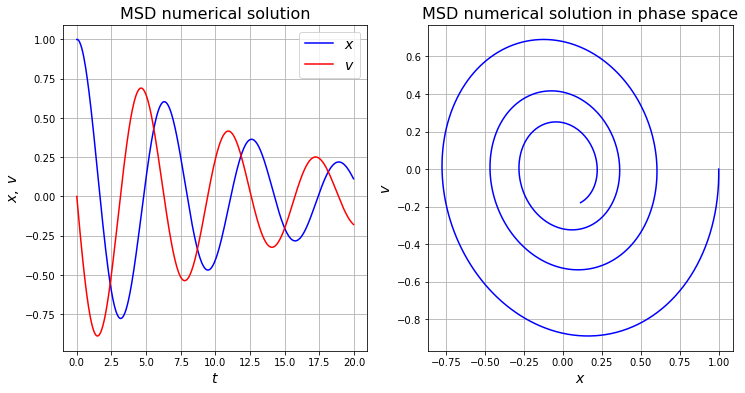

In [3]:
# numerical parameters for problem
om0 = 1
zeta = 0.1
# initial data (we need two for this coupled problem)
x0 = 1
v0 = 0
# simulation period and time step size
tend = 20
dt = 0.04
# the RHS matrix which defines the problem
A = np.matrix([[0, 1], [-om0**2, -2*zeta*om0]])
# the 2x2 identity matrix which we also need in our rearranged time-stepping expression
I = np.identity(2)
# set up some vectors of times and to store solution
t = np.arange(0, tend, dt)
y = np.empty((len(t), 2))
# initialise solution
y[0, :] = np.array((x0, v0))
# time step
for n in range(len(t)-1):
    y[n + 1, :] = (I + A * dt) @ y[n, :]

# pull out the individual solution vectors (don't need to do this)
x = y[:, 0]
v = y[:, 1]

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
ax1.plot(t, x, 'b', label='$x$')
ax1.plot(t, v, 'r', label='$v$')
ax1.set_xlabel(r'$t$', fontsize=14)
ax1.set_ylabel(r'$x,\; v$', fontsize=14)
ax1.set_title('MSD numerical solution', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
ax2.plot(x, v, 'b')
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$v$', fontsize=14)
ax2.set_title('MSD numerical solution in phase space', fontsize=16)
ax2.grid(True)

<div class="optional">

    
## Exercises

- Experiment again with $\Delta t$.

[you should observe that smaller $\Delta t$ gives a better result, but for larger values the result first gets worse, and then if you continue to increase $\Delta t$ the problem is complete garbage].


- Now let's change the problem a bit...

   - physically the value of $\zeta$ tells us how much damping there is in the underlying problem - what happens if we set this to zero, i.e. there's no inherent damping in the problem (and we revert back to simple harmonic motion)?     
    
   - What do you observe about the exact solution and the numerical approximation? 

   - Is the numerical approximation now *qualitatively correct*?
    
</div>

<div class="optional">


## Analysing an ODE system: diagonalisation

Returning to the MSD system, we start from the coupled (linear) ODE system in the matrix form


$$\frac{d\boldsymbol{y}}{dt} = A \boldsymbol{y},\;\;\;\;\;\textrm{where}\;\;\;\;\;
A = \begin{bmatrix}
0 & 1\\
-\omega_0^2 & -2\zeta\omega_0
\end{bmatrix}.$$

As we say above we can make progress in analysing this problem if we first diagonalise it.

If we can do this then we will arrive at a system of **uncoupled** ODEs which will simplify our analysis significantly. 

Just as in the previous example, 
introduce a new variable $\boldsymbol{z}$ which is related to $\boldsymbol{y}$ through a linear transformation: $\boldsymbol{y} = S \boldsymbol{z}$, where $S$ is a $2 \times 2$ transformation matrix. 

If we can diagonalise $A$ then we can write our problem in terms of an (eigen-)basis such that our coupled ODE system decouples into two independent first-order ODEs:

$$\frac{dz_1}{dt} = \lambda_1 z_1, \;\;\;\;\;\;\;  \frac{dz_2}{dt} = \lambda_2 z_2.$$


If our numerical solver does a "good job" (which we are yet to define) on these problems individually, then clearly we should have a good result when we combine these solutions to get back to our original $\boldsymbol{y}\,$ variables. 

Equally if our numerical solver performs badly on the $z$ problems, then we will not have a good solution in terms of the $\boldsymbol{y}\,$ variables. 

So we really are back to asking the question whether our numerical method deals with the linear scalar problem $\, y' = \lambda y\, $ well.

The main difference when dealing with systems in this way is that even if the original problem is *real* (i.e. not complex-valued), then the eigenvalues can absolutely be complex-valued as we shall see for certain parameter choices in the MSD problem shortly. 
    
</div>

<div class="optional">


## Eigenvalue analysis

So to perform this analysis on systems we need to find and consider the eigenvalues of the matrix $A$.

A homework exercise asks you to find the eigenvalues of this problem.

You should find the eigenvalues:

$$\lambda_1 = \omega_0\left(-\zeta + \sqrt{\zeta^2-1}\right),\;\;\;\;
\lambda_2 = \omega_0\left(-\zeta - \sqrt{\zeta^2-1}\right).$$


Note that we have three cases:
1. $\zeta=0$: purely imaginary eigenvalues

2. $0<\zeta<1$: complex eigenvalues with $Re(\lambda)<0$

3. $\zeta\ge 1$: real (negative) eigenvalues

$\zeta$ here is encoding something about the physics of our problem (refer to the linked videos above and <https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator>).

In the three cases above the system is termed: *undamped*, *under-damped* and *over-damped* (with $\zeta=1$ *critically-damped*), respectively.
    
</div>

<div class="optional">


## Stability of the *continuous problem*

It's quite important for us to have an idea whether our continuous problem has exact solution behaviour which is *stable*, in that it doesn't diverge to infinity, as in the case that this is true we will want our discretised problem to have similar behaviour. Often this behaviour (for both the continuous and discrete problems) is dependent on both physical and numerical parameters.


The above diagonalisation of our coupled problem shows that we can actually consider the generic scalar problem


$$\frac{dz}{dt}=\lambda z, \;\;\;\; z(0)=1,$$


for each of the eigenvalues (which remember may be complex valued) of the matrix $A$.


It doesn't matter what initial condition we choose here, we've just chosen the value $(1)$ that leads to the simple solution:

$$ z(t) = \exp(\lambda t).$$

The solution to this problem is termed **stable** if 

$$\lim_{t\rightarrow\infty}z(t)=0,$$

i.e. if $z=0$ is a fixed point. 

The alternative is termed **unstable** and here $z$ would diverge to infinity.

Here (in the continuous case) stability occurs for $Re(\lambda)<0$.

For a general mathematical discussion of stability/fixed point etc of differential equations see <https://en.wikipedia.org/wiki/Stability_theory>.
    
</div>

<div class="optional">


**Aside**

We can see this from [*Euler's formula*](https://en.wikipedia.org/wiki/Euler%27s_formula) which here tells us that

\begin{align*}
z(t)=\exp(\lambda t)&=\exp(\lambda_Rt)\exp(i\lambda_It)\\[5pt]
& = \exp(\lambda_Rt)\left(\cos(\lambda_It) + i\sin(\lambda_It)\right),
\end{align*}

where $\,i=\sqrt{-1}$, $\,\lambda_R=Re(\lambda)$, $\,\lambda_I=Im(\lambda)$.

The result now follows from the fact that $\sin$ and $\cos$ are bounded.

This is because the imaginary part of the above ($i\sin(\lambda_It)$) just oscillates with a magnitude less than one, so it does not impact on whether the long time behaviour of the system converges to zero of infinity, this is dictated by the $\exp(\lambda_Rt)$ factor.

Similarly the real part of the above includes the bounded oscillatory term ($\cos(\lambda_It)$) multiplied again by the 
$\exp(\lambda_Rt)$ factor which again controls whether the system converges to zero of infinity.

So it really is the behaviour of $\exp(\lambda_Rt)$ that dominates, and this behaviour is dictated by whether $\,\lambda_R=Re(\lambda)$ is positive or negative.

You could choose some complex numbers and plot this solution in the complex plane to convince yourself that the imaginary part just leads to bounded oscillations, and the real part controls the growth or decay.

</div>

<div class="optional">

    
So without actually solving the problem, the eigenvalues tell us a lot about the qualitative behaviour of the solution.


**But** if we can actually solve the problem analytically then of course this gives us both qualitative as well as quantitative information we can directly compare any numerical solution against.
    
</div>    

<div class="optional">


## The exact solution

Consider the problem in second-order form

$$\ddot{x} + 2\zeta\omega_0\dot{x}+\omega_0^2x=0$$

A way to solve a homogeneous (zero RHS) linear problem of this form is to seek solutions made up of special functions (see <https://en.wikipedia.org/wiki/Linear_differential_equation#Homogeneous_equation_with_constant_coefficients>).

We search for solutions of the form

$$x(t) = \exp(\alpha t)$$

where $\alpha$ is an unknown constant. 

Note that this simple form of solution guess allows us to write down its derivatives trivially:

$$\dot{x}(t) = \alpha \exp(\alpha t) = \alpha x(t), \qquad
\ddot{x}(t) = \alpha^2 x(t)
$$

substituting into our ODE

$$\left(\alpha^2 + 2\zeta\omega_0\alpha +\omega_0^2 \right)x(t)=0
$$

since the form of $x(t)$ we are considering is non-zero, we must have that

$$\alpha^2 + 2\zeta\omega_0\alpha +\omega_0^2 =0
$$

This is a quadratic with the roots

\begin{align*}
\alpha_{\pm} &= \frac{-2\zeta\omega_0 \pm \sqrt{4\zeta^2\omega_0^2 - 4\omega_0^2}}{2}\\[5pt]
& = -\omega_0\left( \zeta \pm \sqrt{\zeta^2-1}\right)
\end{align*}

[If you're paying attention, technically it should be $\mp$ in the second line since I took a minus sign outside the bracket, but it doesn't really make any difference to how we progress.]

So 

$$x(t) = \exp(\alpha_+ t)\qquad \text{and}\qquad
x(t) = \exp(\alpha_- t)$$

are both solutions to the problem, by linearity and the fact that the problem is homogeneous we can multiply each by an arbitrary constant and we can sum them:

$$x(t) = C_1\exp(\alpha_+ t) + C_2\exp(\alpha_- t)$$

we now have two unknowns $C_1$ and $C_2$ which can be fixed based on the initial conditions.  

At this stage it's important to remember that the constants appearing here could be complex valued, and this will actually be important to ensure that the solution we end up with is real, even in the case when $\alpha_{\pm}$ are complex!

Let's plug in $t=0$:

$$x(0) = C_1+C_2$$

Now since we are considering a physical problem where displacement is given by a real number, while the constants may be complex, the imaginary part of their sum $C_1+C_2$ much vanish/cancel. This means that $\text{Im}C_2 = -\text{Im}C_2$.

If we differentiate our form of solution, and plug in $t=0$ again, we have

$$v(0)=\dot{x}(0)= C_1\alpha_+  C_2\alpha_-$$

we know that $\alpha_{\pm}$ are a complex-conjugate pair, let's write them as $\alpha_{\pm} = a \pm ib$, then 

\begin{align*}
v(0)=\dot{x}(0) &= (\text{Re}C_1 + i\text{Im}C_1)(a+ib)  + (\text{Re}C_2 + i\text{Im}C_2)(a-ib) \\[5pt]
&= (a (\text{Re}C_1+\text{Re}C_2) + b(\text{Im}C_2 - \text{Im}C_1) 
+ i \left[b(\text{Re}C_1 - \text{Re}C_2) + a(\text{Im}C_1 +\text{Im}C_2)  \right]
\end{align*}

We already know that $\text{Im}C_2 = -\text{Im}C_2$, and hence for the imaginary part of the initial velocity to vanish we also need that $\text{Re}C_1 = \text{Re}C_2$. Together this means that to get a real solution (and its derivative), the constants $C_1$ and $C_2$ need to be complex conjugates of one another - we still have to unknowns we need to fix, the real and the imaginary parts of this constant.

So what have we etablished?

The solution is given by

$$x(t) = C_1\exp(\alpha_+ t) + C_2\exp(\alpha_- t)$$

where both the $C$'s and the $\alpha$'s are complex conjugates.

We already wrote $\alpha_{\pm} = a \pm ib$, let's also write

$$C_1 = |C|\exp(i\phi), \qquad\text{and so} \qquad C_2 = |C|\overline{\exp(i\phi)}$$ 

Our solution can now be written as

\begin{align*}
x(t) &= C_1\exp(\alpha_+ t) + C_2\exp(\alpha_- t)\\[5pt]
&=|C|\exp(at)\left( \exp(i\phi)\exp(ibt) + \overline{\exp(-i\phi)}{\exp(-ibt)} \right)\\[5pt]
&=|C|\exp(at)\left( \exp(i(bt+\phi)) + {\exp(-i(bt+\phi))}\right)\\[5pt]
&=2|C|\exp(at)\cos(bt+\phi)
\end{align*}

where $a$ and $b$ come from our already computed eigenvalues (the real and imaginary components), 
and $|C|$ and $\phi$ are the unknowns we need to compute from our initial conditions.

The derivative gives us the $v$ solution:

\begin{align*}
v(t) = \dot{x}(t) &= \frac{d}{dt}2|C|\exp(at)\cos(bt+\phi)\\[5pt]
&= 2|C|\exp(at)\left(-b\sin(bt+\phi) + a \cos(bt+\phi)  \right)
\end{align*}

</div>

<div class="optional">


Consider the case $0<\zeta<1$, the eigenvalues are a complex conjugate pair given by

$$\lambda_1 = -\omega_0\zeta + \omega_0\sqrt{1-\zeta^2}i,\;\;\;\;
\lambda_2 = -\omega_0\zeta - \omega_0\sqrt{1-\zeta^2}i.$$

In this case

$$a = -\omega_0\zeta, \qquad\text{and}\qquad b = \omega_0\sqrt{1-\zeta^2}=:\omega$$

we've introduced this variable $\omega$ to stop us having to write out and compute the full expression repeatedly.

We can write the solution in this case as

$$x(t) = 2|C|\exp(-\omega_0\zeta t)\cos(\omega\,t + \phi)$$

and 

$$v(t) = 2|C|\exp(-\omega_0\zeta t)\left(-\omega\sin(\omega t+\phi) -\omega_0\zeta \cos(\omega t+\phi)\right)$$

which has the derivative

Let's plug in the initial condition:

$$x_0 = x(0) = 2|C|\cos(\phi)$$

and the initial velocity

$$v_0 = \dot{x}(0) =2|C|\left(-\omega\sin(\phi) -\omega_0\zeta \cos(\phi)\right)$$



Plugging the first of these into the second to cancel $C$ we have

\begin{align*}
v_0  &= \frac{x_0}{\cos(\phi)}\left(-\omega\sin(\phi) -\omega_0\zeta \cos(\phi)\right)\\[5pt]
&= \omega x_0\left( -\tan(\phi) - \omega_0\zeta  \right)\\[5pt]
\implies \phi &= \tan^{-1}\left(\frac{-v_0 - \omega_0\zeta x_0}{\omega x_0}\right)
\end{align*}

and then plugging back into the first

$$|C|=\frac{x_0}{ 2\cos(\phi)}$$

</div>

<div class="optional">


## Comparing the analytical solution against a numerical solver

Let's compute a numerical solution using the forward Euler method, and check the analytical solution we've just derived agrees with it.
    
</div>

In [4]:
def msd_exact_sol(t, x0, v0, zeta, om0):
    """Exact solution to the general MSD problem 
    Return: x and v component of solution
    """
    om = om0 * np.sqrt(1-zeta**2)
    phi = np.arctan2( (-v0 - om0*zeta*x0) , (om*x0) )
    CC = x0/(2*np.cos(phi))
    a = -om0*zeta
    b = om0 * np.sqrt(1-zeta**2)
    x_exact = 2*CC*np.exp(a*t)*np.cos(b*t+phi)
    v_exact = 2*CC*np.exp(a*t)*(-b*np.sin(b*t+phi) + a*np.cos(b*t+phi))
    return x_exact, v_exact

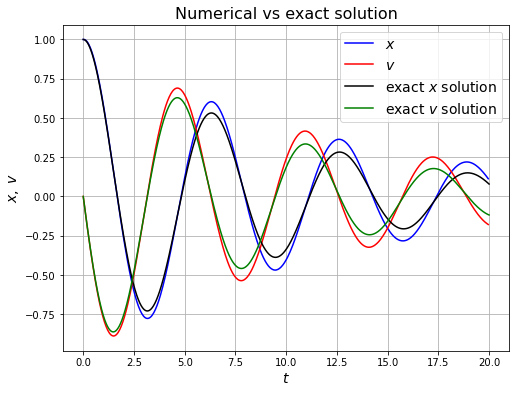

In [5]:
# numerical parameters for problem
om0 = 1
zeta = 0.1

# initial data (we need two for this coupled problem)
x0 = 1
v0 = 0
# simulation period and time step size
tend = 20
dt = 0.04
# the RHS matrix which defines the problem
A = np.matrix([[0, 1], [-om0**2, -2*zeta*om0]])
# the 2x2 identity matrix which we also need in our rearranged time-stepping expression
I = np.identity(2)
# set up some vectors of times and to store solution
t = np.arange(0, tend, dt)
y = np.empty((len(t), 2))
# initialise solution
y[0, :] = np.array((x0, v0))

# time step using forward Euler
for n in range(len(t)-1):
    y[n + 1, :] = (I + A * dt) @ y[n, :]

# pull out the individual solution vectors (don't need to do this)
x = y[:, 0]
v = y[:, 1]

fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
ax1.plot(t, x, 'b', label='$x$')
ax1.plot(t, v, 'r', label='$v$')
ax1.set_xlabel(r'$t$', fontsize=14)
ax1.set_ylabel(r'$x,\; v$', fontsize=14)
ax1.set_title('Numerical vs exact solution', fontsize=16)
ax1.grid(True)

tfine = np.arange(0, tend, dt/100)
x_exact, v_exact = msd_exact_sol(tfine, x0, v0, zeta, om0)
ax1.plot(tfine, x_exact, 'k', label='exact $x$ solution')
ax1.plot(tfine, v_exact, 'g', label='exact $v$ solution')
ax1.legend(loc='best', fontsize=14);

<div class="optional">


Looks good - you could check for convergence.

Let's generate an animation to check the result looks physically plausible.
    
</div>

In [6]:
import matplotlib.animation as animation
from IPython.display import HTML
    
def spring(spring_start, spring_end, y_translate):
    """Plot a 2D spring
    """
    N = 1000
    x = np.linspace(0,1,N)
    straight_bit = 100
    y = np.zeros(N)
    y[straight_bit:-straight_bit] = 0.02*np.sin(2.*np.pi*40*x[straight_bit:-straight_bit])
    ax1.plot((spring_end-spring_start)*x + spring_start, y+y_translate, 'k', lw=2)    

def damper(a, b, c, d, e, f, g):    
    """Plot a 2D damper

          ___________________                 _ f+g/2  
         |              e = piston length
    -----|          |--------------------     - f
         |___________________                 _ f-g/2

    |    |                  |           |         
    a    b                  c           d
    
    
    """
    # image made up of straight lines so the following doesn't need to be a large number
    N = 2
    xs = np.linspace(0,1,N)
    os = np.ones(N)
    # fixed bit
    ax1.plot(a + (b-a)*xs, f*os, 'k', lw=2)
    ax1.plot(b*os, f - g/2 + g*xs, 'k', lw=2)
    ax1.plot(b + (c-b)*xs, f + g/2*os, 'k', lw=2)
    ax1.plot(b + (c-b)*xs, f - g/2*os, 'k', lw=2)
    # moving bit
    ax1.plot(d-e + e*xs, f*os, 'k', lw=2)
    ax1.plot((d-e)*os, f - 0.6*(g/2 - g*xs), 'k', lw=2)
    
def background(wall, floor):    
    """Add a background
    """
    ax1.axvspan(-10, wall, color='lightgrey', zorder=5)
    ax1.axvline(x=wall, color='k', zorder=10)
    ax1.axhspan(-10, floor, color='grey', zorder=15)
    ax1.axhline(y=floor, color='k', zorder=20)
     
# set up our fig for animation     
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)
plt.close()

# numerical parameters for problem
om0 = 1
zeta = 0.1
# initial data (we need two for this coupled problem)
x0 = 1
v0 = 0
tfine = np.arange(0, 40, 1)
x_exact, v_exact = msd_exact_sol(tfine, x0, v0, zeta, om0)

def data_gen(framenumber, x_exact):
    ax1.clear()
    ax1.plot(x_exact[framenumber], 0.03, 'ro', ms=30, zorder=30)
    background(-3.5, 0)
    spring(-3.5, x_exact[framenumber], 0.2)
    damper(-3.5, -3, -0.9 , x_exact[framenumber], 2, 0.1, 0.04)    
    ax1.plot([x_exact[framenumber],x_exact[framenumber]], [0.03, 0.2], 'k', lw=2, zorder=25)
    ax1.set_xlim(-3.8, 1.5)
    ax1.set_ylim(-0.1, 0.3)
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_title('MSD animation', fontsize=14)

anim = animation.FuncAnimation(fig, data_gen, frames=np.arange(0, len(x_exact)), fargs=(x_exact, ),
                               interval=50)

# save the animation as gif or mp4 if needed
#anim.save('animations/MSD.gif', writer='imagemagick')
#anim.save('animations/MSD.mp4', extra_args=['-vcodec', 'libx264'])
# display in notebook
#HTML(anim.to_jshtml())
HTML(anim.to_html5_video())

<div class="optional">


### An aside on generating animations

Note that I am certainly not doing this optimally here, take a look here for a good discussion
<https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/>
    
</div>

<div class="optional">

# A coupled mass spring damper system and a fancier ODE solver [*]

Let's extend our *single* mass system

\begin{align*}
\dot{v} & = -2\zeta\omega_0v-\omega_0^2x,\\[5pt]
\dot{x} & = v.
\end{align*}

to *two* masses. 

I'm not going to compute eigenvalues etc, so let's not bother with the $\zeta$ and $\omega$ derived parameters
and stick with the original physical parameters.

The original second order equation was

$$ma = F: \quad m\ddot{x} = -c\dot{x} -kx \iff m\ddot{x} + c\dot{x} +kx=0 \iff \ddot{x} + \frac{c}{m}\dot{x} + \frac{k}{m}x=0 $$

which we saw as a coupled system of first-order equations could be written as

\begin{align*}
\dot{x} & = v\\
\dot{v} & = -\frac{c}{m}v-\frac{k}{m}^2x
\end{align*}

Now let's consider a system of two springs (with spring constants $k_1$ and $k_2$) with locations $x_1$ and $x_2$ and velocities $v_1$ and $v_2$. Damping is given by the terms with constants $c_1$ and $c_2$.

Assume that underscore 1 indicates the system connected to the wall, and 2 indicates a system connected to the first, which we assume is located to the right of the first. The two masses are $m_1$ and $m_2$

Then our ODE for the first is as before, but now we need to additionally account for the force due to the second spring. Also, previously we didn't need to worry about the length of the spring in its unforced state (we were implicitly assuming that this equated with $x=0$. Let's introduce $L_1$ and $L_2$ for these lengths. $x_2$ is the distance to the wall, so $x_2-x_1$ is the length of the second spring.

This can all be encapsulated in the two coupled second-order ODEs:


\begin{align*}
m_1\ddot{x}_1 &= -c_1\dot{x}_1 - k_1(x_1-L_1) - k_2(x_2 - x_1 - L_2)\\[5pt]
m_2\ddot{x}_2 &= -c_2\dot{x}_2 + k_2(x_2 - x_1 - L_2)
\end{align*}

[Note the equal but opposite forces due to the second spring].

This can be turned into a system of four first-order equations:


\begin{align*}
\dot{x}_1 &= v_1\\[5pt]
\dot{v}_1 &= -\frac{1}{m_1}c_1 v_1 - k_1(x_1-L_1) - k_2(x_2 - x_1 - L_2)\\[5pt]
\dot{x}_2 &= v_2\\[5pt]
\dot{v}_2 &= -\frac{1}{m_1}c_2 v_2 + k_2(x_2 - x_1 - L_2)
\end{align*}

</div>

<div class="optional">

We could solve this using our forward Euler solver, but let's use a much better ODE solver from SciPy.

We will review improved ODE solvers, including what is going on in the SciPy implementation in a later lecture, and for the ACSE students in your next module. If you're interested to know more now take a look at the docs <https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html>

`solve_ivp` provides a range of solvers, we will choose to use the method with the code `RK45` which for people with Matlab experience is equivalent to the default `ode45` solver.
    
</div>

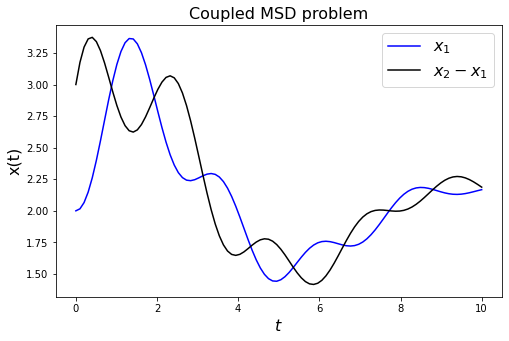

In [7]:
# let's use the solve_ivp
from scipy.integrate import solve_ivp

# we should really pass in the parameters rather than hard-coding them
def f_MSD_coupled(t, state):
    """RHS vector for the system of 1st order ODEs
    governing the coupled MSD problem in the case of two masses

    t: time
    state: state vector [x1, v1, x2, v2]
    """
    # define problems parameters:
    m1 = 1.0
    m2 = 2.5
    k1 = 4.0
    k2 = 3.0
    L1 = 2.0
    L2 = 2.0
    c1 = 0.5
    c2 = 1
    # unpack state
    x1, v1, x2, v2 = state
    # Create the RHS vector
    RHS = [v1, 
           (1/m1)*(-c1*v1 - k1*(x1 - L1) + k2*(x2 - x1 - L2)),
           v2, 
           (1/m2)*(-c2*v2 - k2*(x2 - x1 - L2))]
    return RHS


# Define initial conditions
x1 = 2
v1 = 0.
x2 = 5.
v2 = 2.

# Integration window
t0 = 0.
tf = 10.
# output time we want from the sovler
ts = np.linspace(t0, tf, 100)

# A solver tolerance - not really needed here, use default
tol = 1.e-5
# call the solver
sol = solve_ivp(f_MSD_coupled, [t0, tf], np.array([x1,v1,x2,v2]), method='RK45', t_eval=ts, rtol=tol, atol=tol)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(ts, sol.y[0,:], 'b', label='$x_1$')
ax1.plot(ts, sol.y[2,:]-sol.y[0,:], 'k', label='$x_2-x_1$')
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('x(t)', fontsize=16)
ax1.set_title('Coupled MSD problem', fontsize=16)
ax1.legend(loc='best', fontsize=16)

<div class="optional">

Recall that $x_1$ and $x_2-x_1$ are the lengths of the two springs and we specified the lengths $L_1$ and $L_2$ of the springs in an "unforced" state to be two - hence the reasons these two quantities seem to be converging to two as expected.
    
</div>

In [8]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)
   
# add a first frame
plot = ax1.plot(sol.y[0,0],0.04,'ro', ms=30)
ax1.set_xlim(-0.5, 6.5)
ax1.set_ylim(-0.1, 0.3)
plt.close()

# the dampers are a pain to plot without overlapping, so don't bother here
def data_gen(framenumber, x1, x2):
    ax1.clear()
    # first system
    ax1.plot(x1[framenumber], 0.03, 'ro', ms=30, zorder=30)
    background(0, 0)
    spring(0, x1[framenumber], 0.2)
    ax1.plot([x1[framenumber],x1[framenumber]], [0.03, 0.2], 'k', lw=2, zorder=25)
    # second system
    ax1.plot(x2[framenumber], 0.03, 'ro', ms=30, zorder=30)
    spring(x1[framenumber], x2[framenumber], 0.2)    
    ax1.plot([x2[framenumber],x2[framenumber]], [0.03, 0.2], 'k', lw=2, zorder=25)
    
    ax1.set_xlim(-0.5, 6.5)
    ax1.set_ylim(-0.1, 0.3)
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_title('MSD animation', fontsize=14)

anim = animation.FuncAnimation(fig, data_gen, frames=np.arange(0, len(ts)), fargs=(sol.y[0,:], sol.y[2,:]),
                               interval=50)

# save the animation as gif or mp4 if needed
#anim.save('animations/MSD2.gif', writer='imagemagick')
#anim.save('animations/MSD2.mp4', extra_args=['-vcodec', 'libx264'])
# display in notebook
#HTML(anim.to_jshtml())
HTML(anim.to_html5_video())